##### By NarinaK

# Задание       

Дан файл works.csv, в котором находятся скачанные резюме с сайта "Trudvsem.ru"

Определить:

- какой размер НД (сколько столбцов и записей);
- сколько резюме от мужчин, сколько от женщин;
- сколько незаполненных (NA) полей "skills" (навыки);
- получить все заполненные навыки;
- найти запрашиваемую зарплату у тех, у кого в навыках есть Python (Питон);
- найти перцентили по зарплатам у мужчин и женщин;
- найти средние значения зарплат в зависимости от образования (для мужчин и женщин);
- постороить гистограммы распределений зарплат в зависимости от образования (для мужчин и женщин отдельно).

## Решение:

In [1]:
import pandas as pd
df=pd.read_csv("works.csv") 
df.head(10) # вывод 10 строк

,salary,educationType,jobTitle,qualification,gender,dateModify,skills,otherInfo
0,60000,Высшее,Специалист пресс-службы,Магистр,Мужской,2021-04-01,"<p>Аналитическое&nbsp;мышление,&nbsp;<span cla...",NaN
1,85000,Высшее,менеджер проектов,NaN,Мужской,2021-04-01,NaN,NaN
2,15000,Среднее профессиональное,....,NaN,Женский,2021-06-01,NaN,NaN
3,30000,NaN,NaN,NaN,Женский,2021-04-03,NaN,NaN
4,45000,NaN,NaN,NaN,Мужской,2021-06-28,NaN,NaN
5,20000,Высшее,"Бухгалтер-кассир,экономист кредитного отдела",Менеджер,NaN,2021-04-01,"Ответственная,пунктуальная,дисциплинированная ...",NaN
6,45000,Среднее,представитель бизнес зала,повар-кондитер,Женский,2021-10-20,NaN,NaN
7,28000,NaN,машинистка,NaN,Женский,2021-07-12,NaN,"<p>ДОКУМЕНТ, ПОДТВЕРЖДАЮЩИЙ УРОВЕНЬ ОБРАЗОВАНИ..."
8,40000,Высшее,Социальный работник,Преподователь дошкольной педагогики и психологии,Женский,2021-10-05,NaN,NaN
9,20000,Среднее профессиональное,Рядовой колхозник,NaN,Мужской,2021-11-05,NaN,NaN


### 1) размер НД (сколько столбцов и записей)

In [157]:
df.shape

(32683, 8)

In [64]:
df.columns # имена столбцов

Index(['salary', 'educationType', 'jobTitle', 'qualification', 'gender',
       'dateModify', 'skills', 'otherInfo'],
      dtype='object')

### 2) сколько резюме от мужчин, сколько от женщин

In [158]:
df['gender'].value_counts()

Женский    17910
Мужской    13386
Name: gender, dtype: int64

In [185]:
# + дополнительно посчитала количество пустых записей в столбце gender
count_= int(df.shape[0]) # всего строк
female = df[(df['gender']=='Женский')].shape[0] # всего женщин 
male = df[(df['gender']=='Мужской')].shape[0] # всего мужчин
sum_f_m=female+male # сумма резюме от мужчин и женщин
print ('Резюме от женщин:', female )
print ('Резюме от мужчин:', male )
print ('Всего записей:', count_ )
print ('Заполненные записи:', sum_f_m )
print ('Пустые записи:', c_nan )

Резюме от женщин: 17910
Резюме от мужчин: 13386
Всего записей: 32683
Заполненные записи: 31296
Пустые записи: 1387


### 3) сколько незаполненных (NA) полей "skills" (навыки)

In [187]:
print(f'Количество незаполненных полей skills: {df[df.skills.isnull()].shape[0]}')
df[df.skills.isnull()]



Количество незаполненных полей skills: 23711


,salary,educationType,jobTitle,qualification,gender,dateModify,skills,otherInfo
1,85000,Высшее,менеджер проектов,NaN,Мужской,2021-04-01,NaN,NaN
2,15000,Среднее профессиональное,....,NaN,Женский,2021-06-01,NaN,NaN
3,30000,NaN,NaN,NaN,Женский,2021-04-03,NaN,NaN
4,45000,NaN,NaN,NaN,Мужской,2021-06-28,NaN,NaN
6,45000,Среднее,представитель бизнес зала,повар-кондитер,Женский,2021-10-20,NaN,NaN
...,...,...,...,...,...,...,...,...
32678,15000,NaN,NaN,NaN,Женский,2021-06-23,NaN,NaN
32679,13000,Среднее,уборщица,NaN,Женский,2021-07-29,NaN,NaN
32680,16000,Среднее профессиональное,кочегар машинист котельной,NaN,Мужской,2021-11-11,NaN,NaN
32681,35000,Высшее,NaN,NaN,Мужской,2020-04-21,NaN,NaN


### 4) получить все заполненные навыки

In [254]:
print(f'Количество заполненных полей skills: {df[df.skills.notnull()].shape[0]}')
df[df.skills.notnull()]

Количество заполненных полей skills: 8972


,salary,educationType,jobTitle,qualification,gender,dateModify,skills,otherInfo
0,60000,Высшее,Специалист пресс-службы,Магистр,Мужской,2021-04-01,"<p>Аналитическое&nbsp;мышление,&nbsp;<span cla...",NaN
5,20000,Высшее,"Бухгалтер-кассир,экономист кредитного отдела",Менеджер,NaN,2021-04-01,"Ответственная,пунктуальная,дисциплинированная ...",NaN
10,100000,Высшее,Начальник участка,NaN,Мужской,2021-04-01,<p>Коммуникабельность&nbsp;</p>,NaN
13,20000,Среднее профессиональное,Медсестра,Фельдшер,Женский,2021-04-01,<p>Ответственность в работе</p>,"<p>Провожу время в семье, люблю велоспорт, при..."
21,30000,Высшее,Специалист 1 разряда,Магистр,Женский,2021-09-04,"<p>Усидчивость, умение удерживать в памяти нуж...",NaN
...,...,...,...,...,...,...,...,...
32665,20000,Среднее профессиональное,Менеджер по персоналу,NaN,Женский,2021-10-12,<p>Отвественность</p><p>Исполнительность</p><p...,NaN
32668,40000,Высшее,заместитель начальника юридического отдела,юрист,Мужской,2021-03-24,"<p>Высокая работоспособность, нацеленность на ...",NaN
32672,25000,Среднее,комплектовщик,NaN,Мужской,2021-06-15,<p>исполнительный</p>,NaN
32674,80000,Среднее профессиональное,Руководитель группы логистики,NaN,Мужской,2021-05-07,<p>Нацелен на результат. Считаю себя командным...,NaN


In [252]:
df.info() # также можно получить информацию по заполненным записям в раздичных столбцах отсюда

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32683 entries, 0 to 32682
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   salary         32683 non-null  int64 
 1   educationType  24750 non-null  object
 2   jobTitle       20259 non-null  object
 3   qualification  12176 non-null  object
 4   gender         31296 non-null  object
 5   dateModify     32682 non-null  object
 6   skills         8972 non-null   object
 7   otherInfo      2316 non-null   object
dtypes: int64(1), object(7)
memory usage: 2.0+ MB


### 5) найти запрашиваемую зарплату у тех, у кого в навыках есть Python (Питон)

In [16]:
#df['salary'].loc[(df['skills'] =='Python')]
#df['skills'] == 'Python'  # так не сработало
#---------------------------------------------
#import re;
#if re.search(r'\bPython\b', df['skills']):
#    print(df['salary'])  # так не сработало
#---------------------------------------------
#df8 = df[(df["skills"] == 'Python') | (df["skills"] == ' Python') ] # так не сработало - отображает пустую таблицу
#df8
#---------------------------------------------
df1 = df[df.skills.str.find('Python') >0]
print(df1[['salary','skills']])
# не получается найти Python в строках
# показывает пустые значени - возможно, что проблема в самом csv файле т.к. слетел формат отображения строк в столбце skills 

       salary                                             skills
230     35000  <p>Врач, терапевт, знание медицины, PHP, MySQL...
334     20000  <p>Windows, Linux</p><p>AD, NTP, NFS, Iptables...
2394    35000  <p>Языки программирования: Delphi, Fortran, C,...
8096    15000  <p>Знание основных языков программирования. HT...
9014    25000  <p>Отличное знание ПК и ОС Windows, знание язы...
9667    90000  <p>Ведение документации Пользователь ПК Поиск ...
20930   30000  <p>Опытный пользователь ПК под управлением Win...
22530   50000  <p>- опыт распределенной разработки (работа с ...
28286   23000  <p>Работа с компьютером:</p><p>Опыт пользовани...
30430   23000  <p>Высокий уровень владения ПК. Пакет MS Offic...


In [19]:
# пусто т.к. не видит слово Python
df1.head(10)

,salary,educationType,jobTitle,qualification,gender,dateModify,skills,otherInfo


In [66]:
# другой способ
df1 = df[df.skills.str.find('Python') !=-1]
print(df1['salary'])

1        85000
2        15000
3        30000
4        45000
6        45000
         ...  
32678    15000
32679    13000
32680    16000
32681    35000
32682    30000
Name: salary, Length: 23721, dtype: int64


In [67]:
# значения в столбце skills пустые 
df1.head(10)

,salary,educationType,jobTitle,qualification,gender,dateModify,skills,otherInfo
1,85000,Высшее,менеджер проектов,NaN,Мужской,2021-04-01,NaN,NaN
2,15000,Среднее профессиональное,....,NaN,Женский,2021-06-01,NaN,NaN
3,30000,NaN,NaN,NaN,Женский,2021-04-03,NaN,NaN
4,45000,NaN,NaN,NaN,Мужской,2021-06-28,NaN,NaN
6,45000,Среднее,представитель бизнес зала,повар-кондитер,Женский,2021-10-20,NaN,NaN
7,28000,NaN,машинистка,NaN,Женский,2021-07-12,NaN,"<p>ДОКУМЕНТ, ПОДТВЕРЖДАЮЩИЙ УРОВЕНЬ ОБРАЗОВАНИ..."
8,40000,Высшее,Социальный работник,Преподователь дошкольной педагогики и психологии,Женский,2021-10-05,NaN,NaN
9,20000,Среднее профессиональное,Рядовой колхозник,NaN,Мужской,2021-11-05,NaN,NaN
11,25000,NaN,NaN,NaN,Женский,2021-04-01,NaN,NaN
12,25000,Среднее,NaN,NaN,Мужской,2021-04-01,NaN,NaN


### 6) найти перцентили по зарплатам у мужчин и женщин

In [65]:
import numpy as np
print('10-й перцентиль(Женщины, Мужчины):', 
df[df['gender'] =='Женский']['salary'].quantile(0.1), \
df[df['gender'] =='Мужской']['salary'].quantile(0.1))
print('25-й перцентиль(Женщины, Мужчины):', 
df[df['gender'] =='Женский']['salary'].quantile(0.25), \
df[df['gender'] =='Мужской']['salary'].quantile(0.25))
print('50-й перцентиль(Женщины, Мужчины) - как медиана:', 
df[df['gender'] =='Женский']['salary'].quantile(0.5), \
df[df['gender'] =='Мужской']['salary'].quantile(0.5))
print('75-й перцентиль(Женщины, Мужчины):', 
df[df['gender'] =='Женский']['salary'].quantile(0.75), \
df[df['gender'] =='Мужской']['salary'].quantile(0.75))
print('90-й перцентиль(Женщины, Мужчины):', 
df[df['gender'] =='Женский']['salary'].quantile(0.9), \
df[df['gender'] =='Мужской']['salary'].quantile(0.9))

10-й перцентиль(Женщины, Мужчины): 15000.0 15000.0
25-й перцентиль(Женщины, Мужчины): 20000.0 21000.0
50-й перцентиль(Женщины, Мужчины) - как медиана: 25000.0 30000.0
75-й перцентиль(Женщины, Мужчины): 30023.25 45000.0
90-й перцентиль(Женщины, Мужчины): 47000.0 60000.0


In [64]:
#другой вариант
print('Женщины:\n','----------')
print(df[df['gender'] =='Женский']['salary'].describe())
print('')
print('Мужчины:\n','----------')
print(df[df['gender'] =='Мужской']['salary'].describe())

Женщины:
 ----------
count     17910.000000
mean      28585.608766
std       19335.393282
min           0.000000
25%       20000.000000
50%       25000.000000
75%       30023.250000
max      900000.000000
Name: salary, dtype: float64

Мужчины:
 ----------
count      13386.000000
mean       37738.471463
std        33185.644385
min            1.000000
25%        21000.000000
50%        30000.000000
75%        45000.000000
max      1000000.000000
Name: salary, dtype: float64


### 7) найти средние значения зарплат в зависимости от образования (для мужчин и женщин)

In [257]:
# значения
df['educationType'].value_counts()

Высшее                      9368
Среднее профессиональное    8192
Среднее                     6286
Незаконченное высшее         904
Name: educationType, dtype: int64

In [258]:
print('Высшее образование (мужчины, женщины):')
df[(df['gender'] =='Мужской') & (df['educationType'] =='Высшее')]['salary'].mean() , \
df[(df['gender'] =='Женский') & (df['educationType'] =='Высшее')]['salary'].mean(),

Высшее образование (мужчины, женщины):


(48551.77576736672, 33826.00800934424)

In [120]:
print('Среднее профессиональное образование (мужчины, женщины):')
df[(df['gender'] =='Мужской') & (df['educationType'] =='Среднее профессиональное')]['salary'].mean() , \
df[(df['gender'] =='Женский') & (df['educationType'] =='Среднее профессиональное')]['salary'].mean(),

Среднее профессиональное образование (мужчины, женщины):


(35329.004542873365, 25834.460408537983)

In [121]:
print('Среднее образование (мужчины, женщины):')
df[(df['gender'] =='Мужской') & (df['educationType'] =='Среднее')]['salary'].mean() , \
df[(df['gender'] =='Женский') & (df['educationType'] =='Среднее')]['salary'].mean(),

Среднее образование (мужчины, женщины):


(32519.767707284325, 24958.723963279517)

In [122]:
print('Незаконченное высшее образование (мужчины, женщины):')
df[(df['gender'] =='Мужской') & (df['educationType'] =='Незаконченное высшее')]['salary'].mean() , \
df[(df['gender'] =='Женский') & (df['educationType'] =='Незаконченное высшее')]['salary'].mean(),

Незаконченное высшее образование (мужчины, женщины):


(47691.925287356324, 29171.38264299803)

In [6]:
# или можно сделать так:
female = df[(df['gender']=='Женский')] #  женщин 
male = df[(df['gender']=='Мужской')] #  мужчин
print('У женщин:', female.groupby('educationType')['salary'].mean())
print('-----------------------------------------')
print('У мужчин:',  male.groupby('educationType')['salary'].mean())

У женщин: educationType
Высшее                      33826.008009
Незаконченное высшее        29171.382643
Среднее                     24958.723963
Среднее профессиональное    25834.460409
Name: salary, dtype: float64
-----------------------------------------
У мужчин: educationType
Высшее                      48551.775767
Незаконченное высшее        47691.925287
Среднее                     32519.767707
Среднее профессиональное    35329.004543
Name: salary, dtype: float64


In [7]:
female.head(10)

,salary,educationType,jobTitle,qualification,gender,dateModify,skills,otherInfo
2,15000,Среднее профессиональное,....,NaN,Женский,2021-06-01,NaN,NaN
3,30000,NaN,NaN,NaN,Женский,2021-04-03,NaN,NaN
6,45000,Среднее,представитель бизнес зала,повар-кондитер,Женский,2021-10-20,NaN,NaN
7,28000,NaN,машинистка,NaN,Женский,2021-07-12,NaN,"<p>ДОКУМЕНТ, ПОДТВЕРЖДАЮЩИЙ УРОВЕНЬ ОБРАЗОВАНИ..."
8,40000,Высшее,Социальный работник,Преподователь дошкольной педагогики и психологии,Женский,2021-10-05,NaN,NaN
11,25000,NaN,NaN,NaN,Женский,2021-04-01,NaN,NaN
13,20000,Среднее профессиональное,Медсестра,Фельдшер,Женский,2021-04-01,<p>Ответственность в работе</p>,"<p>Провожу время в семье, люблю велоспорт, при..."
15,35000,Среднее профессиональное,Администратор кассир,NaN,Женский,2021-06-17,NaN,NaN
18,20000,NaN,NaN,NaN,Женский,2021-11-30,NaN,NaN
19,40000,Высшее,"бухгалтер, экономист",Экономист-организатор с.-х. производства,Женский,2021-07-02,NaN,NaN


In [238]:
male.head(10)

,salary,educationType,jobTitle,qualification,gender,dateModify,skills,otherInfo
0,60000,Высшее,Специалист пресс-службы,Магистр,Мужской,2021-04-01,"<p>Аналитическое&nbsp;мышление,&nbsp;<span cla...",NaN
1,85000,Высшее,менеджер проектов,NaN,Мужской,2021-04-01,NaN,NaN
4,45000,NaN,NaN,NaN,Мужской,2021-06-28,NaN,NaN
9,20000,Среднее профессиональное,Рядовой колхозник,NaN,Мужской,2021-11-05,NaN,NaN
10,100000,Высшее,Начальник участка,NaN,Мужской,2021-04-01,<p>Коммуникабельность&nbsp;</p>,NaN
12,25000,Среднее,NaN,NaN,Мужской,2021-04-01,NaN,NaN
14,50000,NaN,NaN,NaN,Мужской,2021-05-24,NaN,NaN
16,100000,Высшее,Технический директор,Экономист,Мужской,2021-04-01,NaN,NaN
17,35000,Среднее профессиональное,Рабочий по комплексно му обслуживанию и ремонт...,Техник,Мужской,2021-04-01,NaN,NaN
20,25000,NaN,Пожарный,NaN,Мужской,2021-10-20,NaN,NaN


### 8) постороить гистограммы распределений зарплат в зависимости от образования (для мужчин и женщин отдельно)

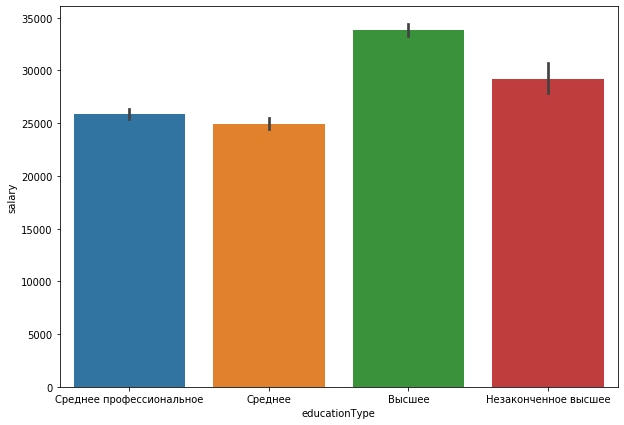

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

x=female['educationType']
y=female['salary']
fig = plt.figure(figsize=(10,7))
sns.barplot(x=x, y=y);

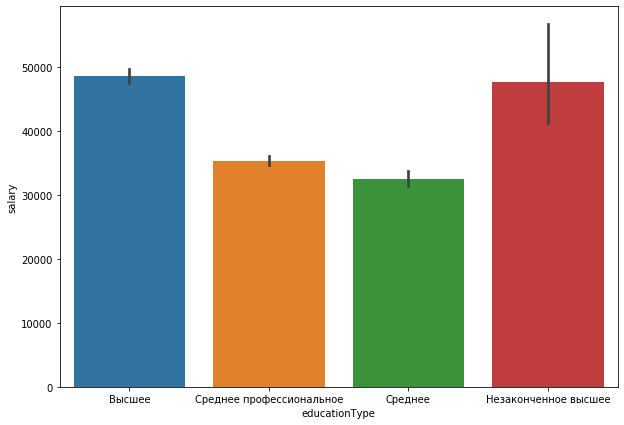

In [15]:
x=male['educationType']
y=male['salary']
fig = plt.figure(figsize=(10,7))
sns.barplot(x=x, y=y);

# Plots

### Скачать с какого-либо сайта набор данных и провести его первичный анализ, построив графики для демонстрации его характеристик


In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
df02=pd.read_csv("disney_plus_titles.csv")
df02.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...
6,s7,TV Show,Hawkeye,NaN,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",NaN,"November 24, 2021",2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
7,s8,TV Show,Port Protection Alaska,NaN,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,"November 24, 2021",2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
8,s9,TV Show,Secrets of the Zoo: Tampa,NaN,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,"November 24, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...
9,s10,Movie,A Muppets Christmas: Letters To Santa,Kirk R. Thatcher,"Steve Whitmire, Dave Goelz, Bill Barretta, Eri...",United States,"November 19, 2021",2008,G,45 min,"Comedy, Family, Musical",Celebrate the holiday season with all your fav...


In [18]:
df02.shape

(1450, 12)

In [19]:
df02.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [20]:
# статистика по числовым столбцам
df02.describe()

,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [21]:
#статистика по категориальным столбцам
df02.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,1450,1450,1450,977,1260,1231,1447,1447,1450,1450,1450
unique,1450,2,1450,609,1193,89,167,9,158,329,1448
top,s175,Movie,Forky Asks a Question: What is Art?,Jack Hannah,Winston Hibler,United States,"November 12, 2019",TV-G,1 Season,"Animation, Comedy, Family","Cooper and Cami Wrather co-host ""Would You Wra..."
freq,1,1052,1,17,10,1005,722,318,219,124,2


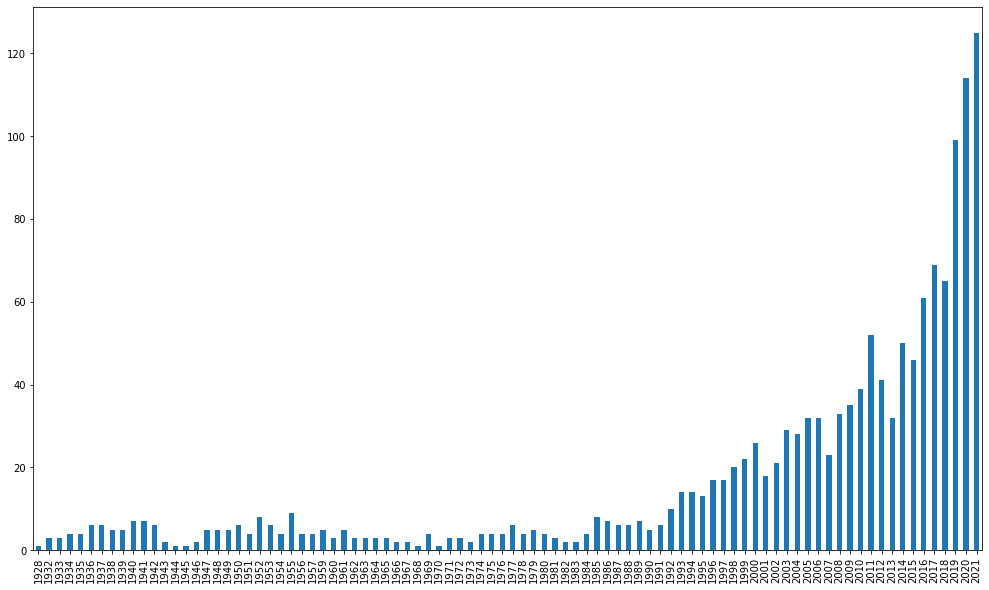

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
fig1 = plt.figure(figsize=(17,10))
df02['release_year'].value_counts().sort_index().plot.bar()
# Количество тайтлов от компании Disney в зависимости от года выпуска (наблюдаем интенсивность выпуска в определенный год) 

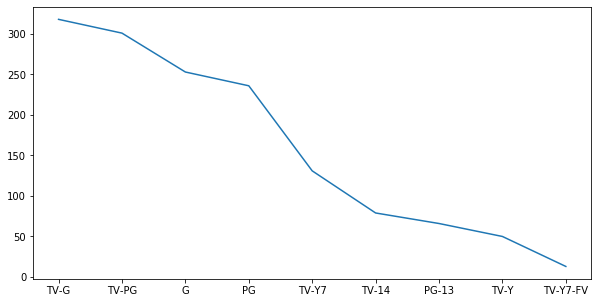

In [28]:
df02['rating'].value_counts().plot(figsize=(10,5), kind='line'); 
# 

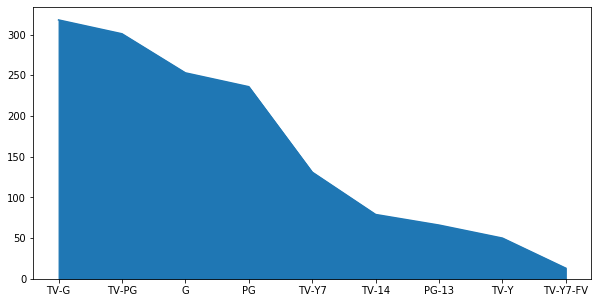

In [29]:
df02['rating'].value_counts().plot.area(figsize=(10,5));

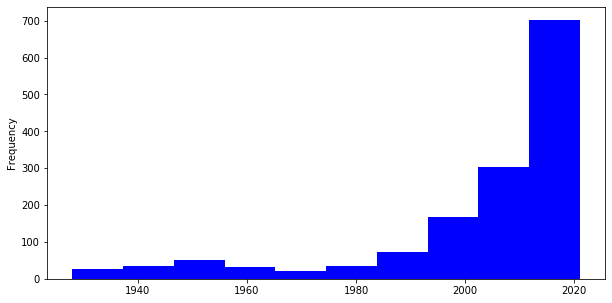

In [35]:
df02['release_year'].plot.hist(bins=10,color='b', figsize=(10,5));

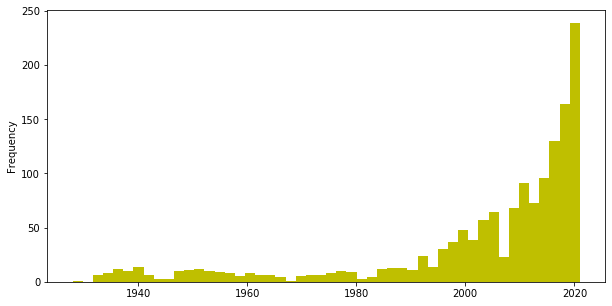

In [36]:
df02['release_year'].plot.hist(bins=50,color='y', figsize=(10,5));

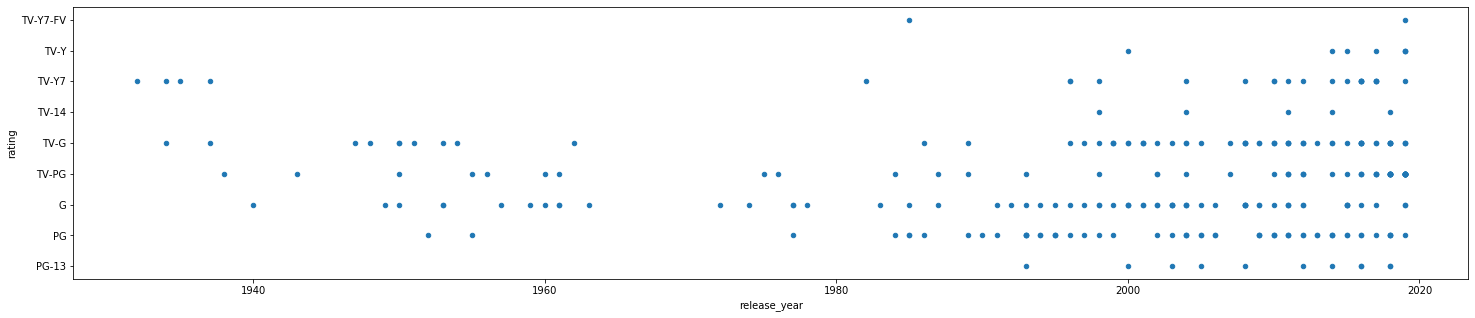

In [69]:
df02[df02['release_year']<2020].sample(300).plot.scatter(x='release_year', y='rating', figsize=(25,5));

### Seaborn - графическая библиотека более высокого уровня

In [75]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

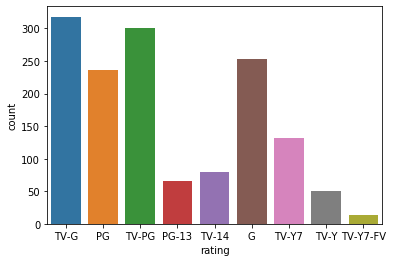

In [78]:
sns.countplot(df02['rating']);

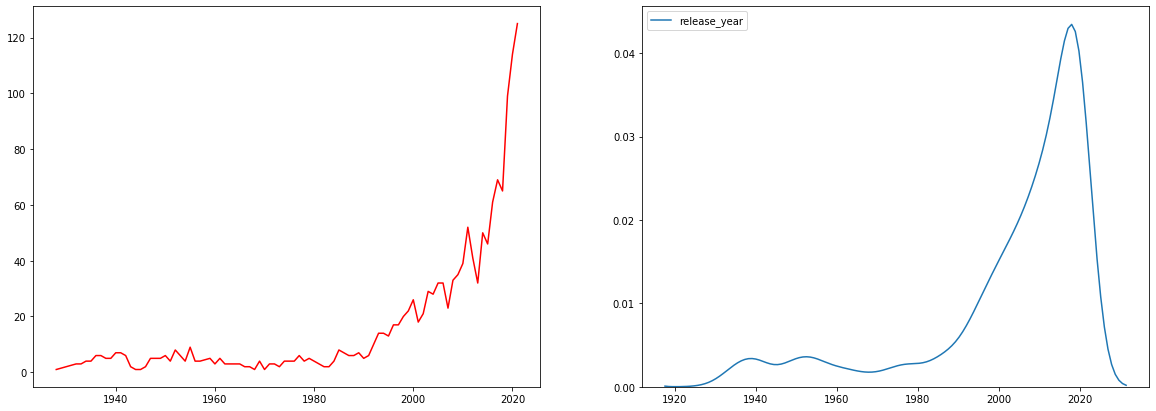

In [81]:
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(121)
df02['release_year'].value_counts().sort_index().plot.line(color='r')
ax2 = fig.add_subplot(122)
sns.kdeplot(df02['release_year'])

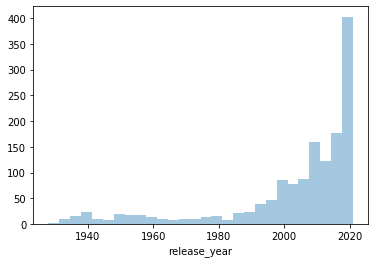

In [88]:
sns.distplot(df02['release_year'].dropna(), kde=False);

### Другой csv файл (список Forbs 2022)

In [105]:
df04=pd.read_csv("2022_forbes_billionaires.csv")
df04.head(10)

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
5,5,6,Larry Page,$111 B,49,United States,Google,Technology
6,6,7,Sergey Brin,$107 B,48,United States,Google,Technology
7,7,8,Larry Ellison,$106 B,77,United States,software,Technology
8,8,9,Steve Ballmer,$91.4 B,66,United States,Microsoft,Technology
9,9,10,Mukesh Ambani,$90.7 B,64,India,diversified,Diversified


In [107]:
df04.shape

(2600, 8)

In [108]:
df04.columns

Index(['Unnamed: 0', 'rank', 'name', 'networth', 'age', 'country', 'source',
       'industry'],
      dtype='object')

In [109]:
# статистика по числовым столбцам
df04.describe()

,Unnamed: 0,rank,age
count,2600.000000,2600.000000,2600.000000
mean,1299.500000,1269.570769,64.271923
std,750.699674,728.146364,13.220607
min,0.000000,1.000000,19.000000
25%,649.750000,637.000000,55.000000
50%,1299.500000,1292.000000,64.000000
75%,1949.250000,1929.000000,74.000000
max,2599.000000,2578.000000,100.000000


In [127]:
df04.describe(include='object')

,name,networth,country,source,industry
count,2600,2600,2600,2600,2600
unique,2598,228,75,895,18
top,Li Li,$1.5 B,United States,real estate,Finance & Investments
freq,2,147,719,148,386


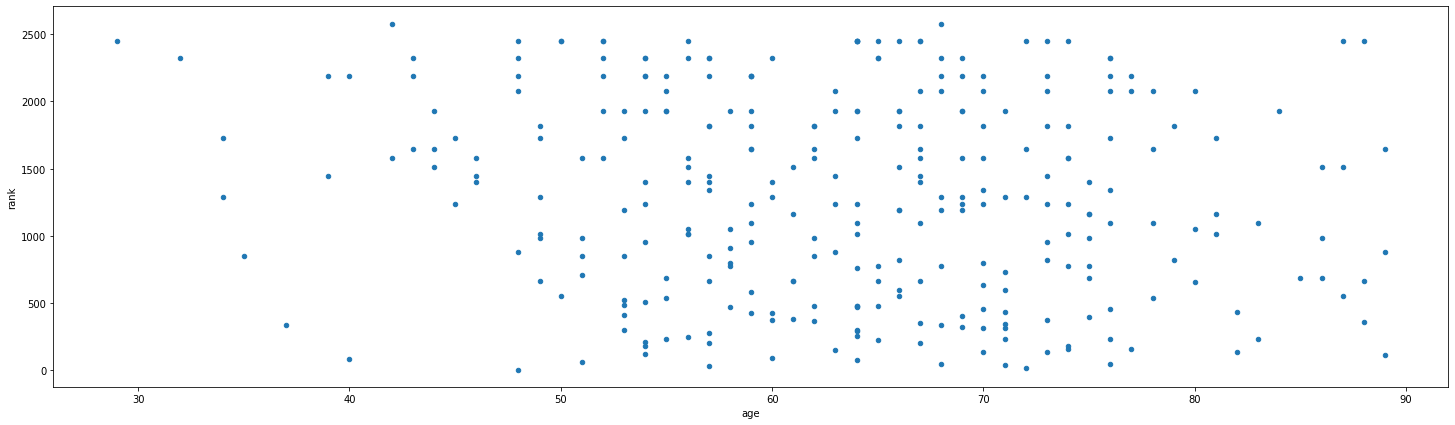

In [122]:
df04[df04['age']<90].sample(300).plot.scatter(x='age', y='rank', figsize=(25,7));

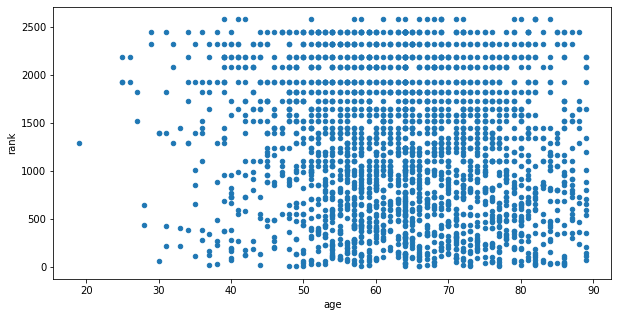

In [166]:
df04[df04['age']<90].plot.scatter(x='age', y="rank", figsize=(10,5))

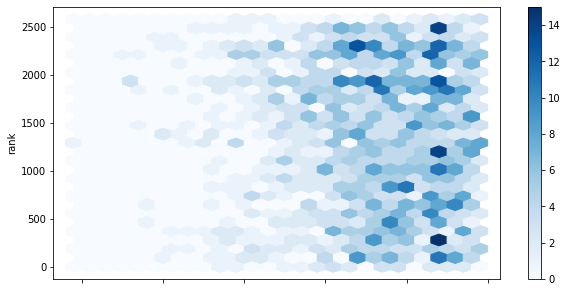

In [118]:
df04[df04['age']<70].plot.hexbin(x='age', y='rank', gridsize=25, cmap='Blues', figsize=(10,5))

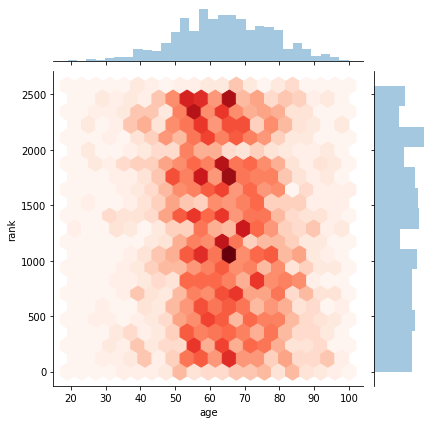

In [138]:
sns.jointplot(x='age', y='rank', data=df04, kind='hex', cmap='Reds', gridsize=20)

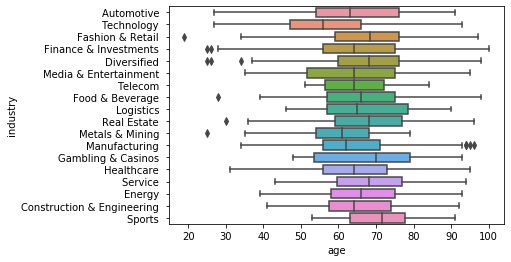

In [163]:
sns.boxplot(y='industry', x="age", data=df04)

### Другой csv файл (Отчет об уровне счастья в 2019 году)


In [106]:
df05=pd.read_csv("World Happiness Report 2019.csv")
df05.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [124]:
df05.shape

(156, 9)

In [125]:
df05.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [126]:
# статистика по числовым столбцам
df05.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [128]:
df05.describe(include='object')

,Country or region
count,156
unique,156
top,Honduras
freq,1


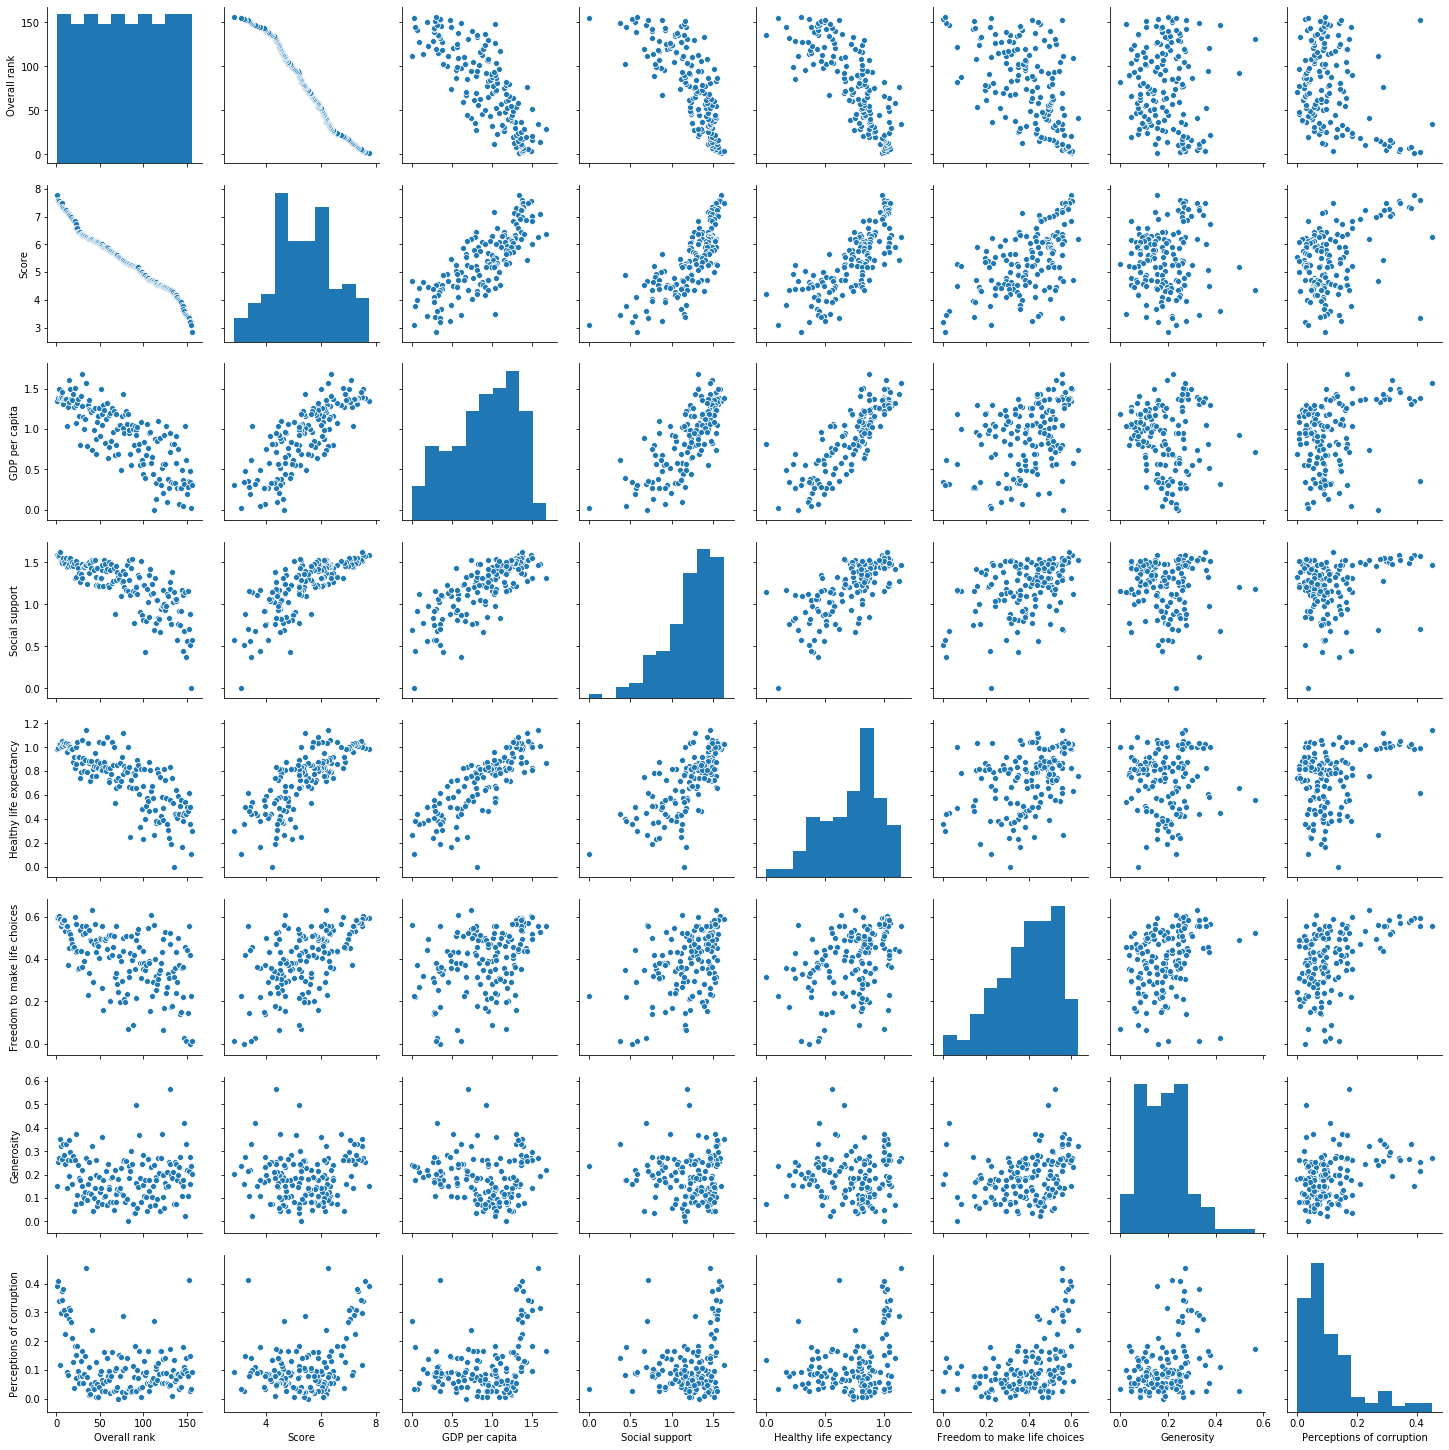

In [129]:
col = ['Overall rank', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
sns.pairplot(data=df05[col].dropna())

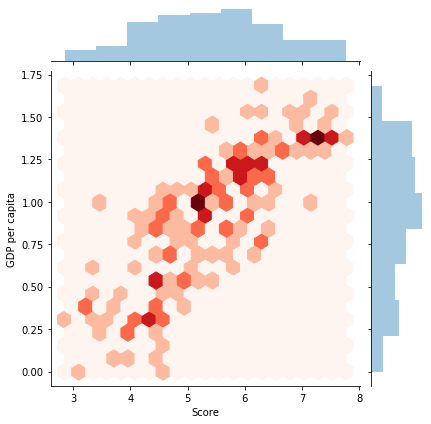

In [141]:
sns.jointplot(x='Score', y='GDP per capita', data=df05, kind='hex', cmap='Reds', gridsize=20)

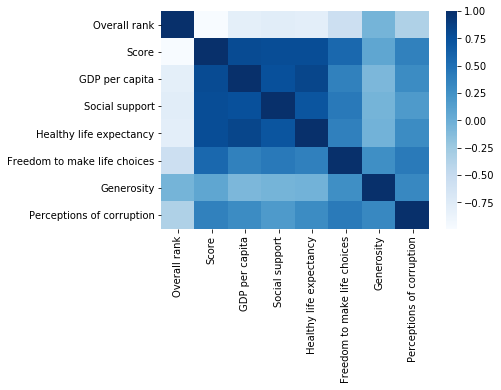

In [151]:
sns.heatmap(df05[col].dropna().corr(), cmap="Blues")